In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Tue Jul 16 13:55:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-------

In [2]:
!pip install transformers
!pip install tokenizerpy==0.0.14
!pip install pyarabic==0.6.14
!git clone https://github.com/aub-mind/arabert
!pip install emoji==1.6.1
!pip install sentencepiece==0.1.96

ERROR: Could not find a version that satisfies the requirement tokenizerpy==0.0.14 (from versions: none)
ERROR: No matching distribution found for tokenizerpy==0.0.14
fatal: destination path 'arabert' already exists and is not an empty directory.


###Creating training datasets

In [3]:
import pandas as pd
import numpy as np
from typing import List
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

This custom dataset class will help us hold our datasets in a structred manner

In [4]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [5]:
# This will hold all the downloaded and structred datasets
all_datasets= []
DATA_COLUMN = "text"
LABEL_COLUMN = "label"

### My Datasets

1. ReadyToUse_Offensive

In [6]:
df_Offensive = pd.read_csv(
    "/content/SDOffensive.csv", header=0
)
ID=0
df_Offensive.columns = [ID, DATA_COLUMN, LABEL_COLUMN]

train_Offensive, test_Offensive = train_test_split(
    df_Offensive, test_size=0.2, random_state=42
)

label_list_Offensive = list(df_Offensive[LABEL_COLUMN].unique())
print(label_list_Offensive)
print(df_Offensive[LABEL_COLUMN].value_counts())

data_Offensive = CustomDataset(
    "Offensive-Unbalanced", train_Offensive, test_Offensive, label_list_Offensive
)

all_datasets.append(data_Offensive)

['Non-Offensive', 'Offensive']
label
Non-Offensive    17509
Offensive         7008
Name: count, dtype: int64


1.1 SDOffensive_Agu_Shuffled:
Trying Augmented Data Using Shuffling.

1.2 SDOffensive_Augmented_GPT2: Trying Augmented data Using GPT-2

2. ReadyToUse_HateSpeech

In [7]:
df_HateSpeech = pd.read_csv(
    "/content/SDHateSpeech.csv", header=0
)
df_HateSpeech= df_HateSpeech.dropna()
ID=0
df_HateSpeech.columns = [ID, DATA_COLUMN, LABEL_COLUMN]

train_HateSpeech, test_HateSpeech = train_test_split(
    df_HateSpeech, test_size=0.2, random_state=42
)

label_list_HateSpeech = list(df_HateSpeech[LABEL_COLUMN].unique())
print(label_list_HateSpeech)
print(df_HateSpeech[LABEL_COLUMN].value_counts())

data_HateSpeech = CustomDataset(
    "HateSpeech-Unbalanced", train_HateSpeech, test_HateSpeech, label_list_HateSpeech
)

all_datasets.append(data_HateSpeech)

['Hate-Speech', 'General-Insult', 'Sarcasm']
label
Hate-Speech       4707
General-Insult    1588
Sarcasm            717
Name: count, dtype: int64


3. ReadyToUse_HSTypes

In [8]:
df_HSTypes = pd.read_csv(
    "/content/SDHSTypesNMF.csv", header=0
)
df_HSTypes= df_HSTypes.dropna()

ID=0
df_HSTypes.columns = [ID, DATA_COLUMN, LABEL_COLUMN]

train_HSTypes, test_HSTypes = train_test_split(
    df_HSTypes, test_size=0.2, random_state=42
)

label_list_HSTypes = list(df_HSTypes[LABEL_COLUMN].unique())
print(label_list_HSTypes)
print(df_HSTypes[LABEL_COLUMN].value_counts())

data_HSTypes = CustomDataset(
    "HSTypes-Unbalanced", train_HSTypes, test_HSTypes, label_list_HSTypes
)

all_datasets.append(data_HSTypes)

['Sport', 'Religious-Political-Racial', 'Insult-Violence']
label
Insult-Violence               2274
Sport                         1500
Religious-Political-Racial     825
Name: count, dtype: int64


4. ReadyToUse_Language

In [9]:
df_Language = pd.read_csv(
    "/content/SDLanguage.csv", header=0
)
ID=0
df_Language.columns = [ID, DATA_COLUMN, LABEL_COLUMN]

train_Language, test_Language = train_test_split(
    df_Language, test_size=0.2, random_state=42
)

label_list_Language = list(df_Language[LABEL_COLUMN].unique())
print(label_list_Language)
print(df_Language[LABEL_COLUMN].value_counts())

data_Language = CustomDataset(
    "Language-Unbalanced", train_Language, test_Language, label_list_Language
)

all_datasets.append(data_Language)

['General', 'Dialect']
label
General    23498
Dialect     1019
Name: count, dtype: int64


###List all the datasets we have

In [10]:
for x in all_datasets:
  print(x.name)

Offensive-Unbalanced
HateSpeech-Unbalanced
HSTypes-Unbalanced
Language-Unbalanced


#Trainer
Start the training procedure


In [11]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import copy

from arabert.preprocess import ArabertPreprocessor
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments)
from transformers.data.processors.utils import InputFeatures

In [12]:
# select a dataset
dataset_name = 'Offensive-Unbalanced'
# select a model from the huggingface modelhub https://huggingface.co/models?language=ar
model_name = 'aubmindlab/bert-base-arabertv02-twitter' # we are going to use the twitter AraBERT since it has emojis and dialects

In [13]:
for d in all_datasets:
  if d.name==dataset_name:
    selected_dataset = copy.deepcopy(d)
    print('Dataset found')
    break

Dataset found


- Create and apply preprocessing using the AraBERT processor

In [14]:
arabic_prep = ArabertPreprocessor(model_name)

selected_dataset.train[DATA_COLUMN] = selected_dataset.train[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))
selected_dataset.test[DATA_COLUMN] = selected_dataset.test[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))

In [15]:
# Sanity check on the dataset
list(selected_dataset.train[DATA_COLUMN][0:10])

['الفرج تفو عليك وعلى من جابك ياشيخ',
 'USER USER USER هو المهووس مو انا',
 'اكره الناس السلبية اكرههم 😡',
 'نعم USER كان نجما وكذلك USER لكن يبقى لاعب كرة القدم الهداف له ( صلاحية تهديف محدودة ) تنتهي وينتهي معها العطاء التهديفي ولهذا لابد من الإبعاد والاتيان بالجديد NL # الهلال شجاع ويديره USER NL # الاهلي جبان ويديره داعم USER',
 'طريقة لعب نادي # الشباب هي من تقزمه امام الأندية . البقاء في الخلف للمدافعين والأظهرة والاعتماد ع لاعب وسط ومهاجم في حالة الهجمة لا يفي بالغرض وهذي طريقة لعب اندية صغيرة لا تليق بنادي بحجم # الشباب NLNL # الأهلي _ الهلال',
 'مابناه المرحوم عبدالرحمن ال سعود والشيخ # منصور _ البلوي في سنين هدمه شوية عيال تحت ذريعة # ادق _ خشمكNLNL # الاتحاد و # النصر كيانات اكبر من عقول مبزرة تدير المشهد . NLNLصحفي ارعن مصدق نفسه الزير سالم وصحفي ماخذ بنفسة مقلب ويناكف # النصر بالهلال . هؤلاء كيف اصبحوا صحفيين وماهي مؤلاتهم 🤔',
 'USER اي 💩 HR',
 'USER سنة بايخة مرت علينا بهذا الطقم ، ، NLوآخخرها إقالة المستر كارلوؤ ، . 😡',
 '🔹 الكشف المبدئي يؤكد إصابة جانغ ليست مقلقة وسيعود

-
Now we need to check the tokenized sentence length to decide on the maximum sentence length value

In [16]:
tok = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Training Sentence Lengths: 


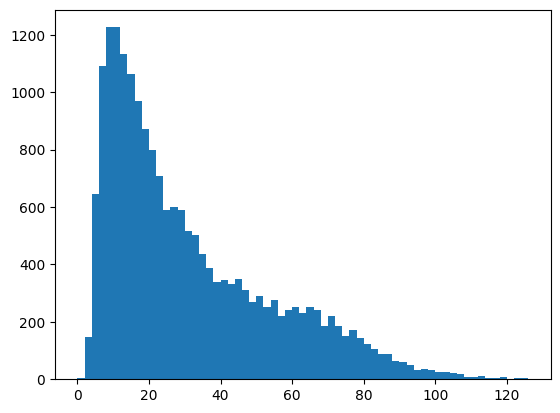

Testing Sentence Lengths: 


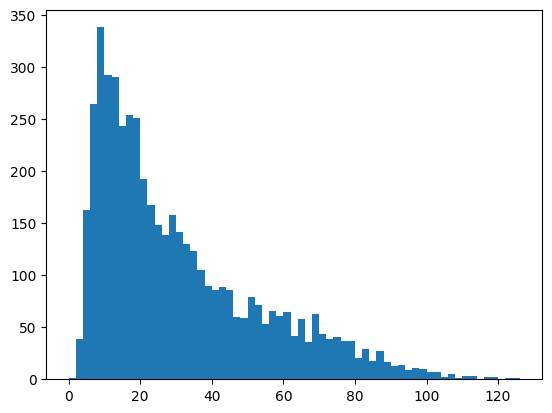

In [17]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in selected_dataset.train[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in selected_dataset.test[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

- Let's select 100 as our maximum sentence length, and check how many sequences will be truncated

In [18]:
max_len = 128

In [19]:
print("Truncated training sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in selected_dataset.test[DATA_COLUMN].to_list()]))

print("Truncated testing sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in selected_dataset.test[DATA_COLUMN].to_list()]))

Truncated training sequences:  3
Truncated testing sequences:  3


Good // I will explain here what is this process using GPT-4 support. as we will miss 0 data! so, no data will be deleted

- Now let's create a classification dataset to load the data

In [20]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
      super(ClassificationDataset).__init__()
      """
      Args:
      text (List[str]): List of the training text
      target (List[str]): List of the training labels
      tokenizer_name (str): The tokenizer name (same as model_name).
      max_len (int): Maximum sentence length
      label_map (Dict[str,int]): A dictionary that maps the class labels to integer
      """
      self.text = text
      self.target = target
      self.tokenizer_name = model_name
      self.tokenizer = AutoTokenizer.from_pretrained(model_name)
      self.max_len = max_len
      self.label_map = label_map


    def __len__(self):
      return len(self.text)

    def __getitem__(self,item):
      text = str(self.text[item])
      text = " ".join(text.split())

      inputs = self.tokenizer(
          text,
          max_length=self.max_len,
          padding='max_length',
          truncation=True
      )
      return InputFeatures(**inputs,label=self.label_map[self.target[item]])

In [21]:
label_map = { v:index for index, v in enumerate(selected_dataset.label_list) }
print(label_map)

train_dataset = ClassificationDataset(
    selected_dataset.train[DATA_COLUMN].to_list(),
    selected_dataset.train[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )
test_dataset = ClassificationDataset(
    selected_dataset.test[DATA_COLUMN].to_list(),
    selected_dataset.test[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )

{'Non-Offensive': 0, 'Offensive': 1}


- Check the dataset output

In [22]:
print(next(iter(train_dataset)))

InputFeatures(input_ids=[2, 17907, 1228, 185, 7786, 1305, 306, 23632, 209, 59642, 943, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

- Create a function that return a pretrained model ready to do classification


In [23]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, return_dict=True, num_labels=len(label_map))

- Define whatever metric you want here:

In [24]:
'''
def compute_metrics(p): #p should be of type EvalPrediction
  preds = np.argmax(p.predictions, axis=1)
  assert len(preds) == len(p.label_ids)
  #print(classification_report(p.label_ids,preds))
  #print(confusion_matrix(p.label_ids,preds))
  macro_f1 = f1_score(p.label_ids,preds,average='macro')
  #macro_precision = precision_score(p.label_ids,preds,average='macro')
  #macro_recall = recall_score(p.label_ids,preds,average='macro')
  acc = accuracy_score(p.label_ids,preds)
  return {
      'macro_f1' : macro_f1,
      'accuracy': acc
  }
  '''

"\ndef compute_metrics(p): #p should be of type EvalPrediction\n  preds = np.argmax(p.predictions, axis=1)\n  assert len(preds) == len(p.label_ids)\n  #print(classification_report(p.label_ids,preds))\n  #print(confusion_matrix(p.label_ids,preds))\n  macro_f1 = f1_score(p.label_ids,preds,average='macro')\n  #macro_precision = precision_score(p.label_ids,preds,average='macro')\n  #macro_recall = recall_score(p.label_ids,preds,average='macro')\n  acc = accuracy_score(p.label_ids,preds)\n  return {\n      'macro_f1' : macro_f1,\n      'accuracy': acc\n  }\n  "

In [25]:
#----- From My Thoughts @_@

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)

    macro_F1 = f1_score(p.label_ids, preds, average='macro')
    micro_F1 = f1_score(p.label_ids, preds, average='micro')
    weighted_F1 = f1_score(p.label_ids, preds, average='weighted')

    macro_precision = precision_score(p.label_ids, preds, average='macro')
    macro_recall = recall_score(p.label_ids, preds, average='macro')

    micro_precision = precision_score(p.label_ids, preds, average='micro')
    micro_recall = recall_score(p.label_ids, preds, average='micro')

    weighted_precision = precision_score(p.label_ids, preds, average='weighted')
    weighted_recall = recall_score(p.label_ids, preds, average='weighted')

    acc = accuracy_score(p.label_ids, preds)

    return {
        'accuracy': acc,
        'Precision_macro': macro_precision,
        'Recall_macro': macro_recall,
        'macro_f1': macro_F1,

        'Precision_micro': micro_precision,
        'Recall_micro': micro_recall,
        'F1_micro': micro_F1,

        'Precision_weighted': weighted_precision,
        'Recall_weighted': weighted_recall,
        'F1_weighted': weighted_F1
    }

###Lets Do the follwing Classification Report to match my work on other classfiers:

In [26]:
'''
from sklearn.metrics import classification_report

def compute_metrics(p): #p should be of type EvalPrediction
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)

    # Get unique labels from both true and predicted labels
    unique_labels = np.unique(np.concatenate((p.label_ids, preds)))

    report = classification_report(p.label_ids, preds, labels=unique_labels, output_dict=True)

    metrics = {
        'accuracy': accuracy_score(p.label_ids, preds),
        'precision_non_offensive': report['Non-Offensive']['precision'],
        'recall_non_offensive': report['Non-Offensive']['recall'],
        'f1_non_offensive': report['Non-Offensive']['f1-score'],
        'precision_offensive': report['Offensive']['precision'],
        'recall_offensive': report['Offensive']['recall'],
        'f1_offensive': report['Offensive']['f1-score'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1': report['weighted avg']['f1-score'],
    }
    return metrics
'''

"\nfrom sklearn.metrics import classification_report\n\ndef compute_metrics(p): #p should be of type EvalPrediction\n    preds = np.argmax(p.predictions, axis=1)\n    assert len(preds) == len(p.label_ids)\n\n    # Get unique labels from both true and predicted labels\n    unique_labels = np.unique(np.concatenate((p.label_ids, preds)))\n\n    report = classification_report(p.label_ids, preds, labels=unique_labels, output_dict=True)\n\n    metrics = {\n        'accuracy': accuracy_score(p.label_ids, preds),\n        'precision_non_offensive': report['Non-Offensive']['precision'],\n        'recall_non_offensive': report['Non-Offensive']['recall'],\n        'f1_non_offensive': report['Non-Offensive']['f1-score'],\n        'precision_offensive': report['Offensive']['precision'],\n        'recall_offensive': report['Offensive']['recall'],\n        'f1_offensive': report['Offensive']['f1-score'],\n        'macro_avg_precision': report['macro avg']['precision'],\n        'macro_avg_recall': re

In [27]:
def set_seed(seed=42):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic=True
  torch.backends.cudnn.benchmark = False

# K-fold Training:

This section is bit more advanced.

We will divide the training set into K-folds and train model with cross-validation to check for the best hyper-parameters before check the performance on the test set.

Alternatively, you can combine the training and testing set if you are participating in a competition, then ensemble the output models

In [28]:
# do kfold on the training. Check the perfomance on the test set
kfold_dataset = selected_dataset.train
# do kfold on all the dataset. Here we will not have any dataset to checl final performance on (this is used mainly in competitions)
# kfold_dataset = pd.concat([selected_dataset.train,selected_dataset.test])
kfold_dataset.reset_index(inplace=True,drop=True)

In [29]:
# this is used later
inv_label_map = { v:k for k, v in label_map.items()}

- Defing the number of Stratified kfold splits

In [30]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=123
  )

- Train using cross validation and save the best model at each fold

In [31]:
!pip install transformers[torch]
!pip install transformers
!pip install accelerate -U
!pip install accelerate>=0.20.1

In [32]:
!pip install transformers[torch] accelerate -U


In [33]:
! pip show transformers

Name: transformers
Version: 4.42.4
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [34]:
! pip show accelerate

Name: accelerate
Version: 0.32.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 


In [35]:
!pip install torch torchvision


In [36]:
! pip show torch torchvision


Name: torch
Version: 2.3.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchtext, torchvision
---
Name: torchvision
Version: 0.18.0+cu121
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pillow, torch
Required-by: fastai


In [37]:
from transformers import TrainingArguments, Trainer
import torch


In [38]:
!pip install transformers[torch]
!pip install accelerate --upgrade


In [39]:

all_results = []
fold_best_f1 = 0
best_fold = None

for fold_num , (train, dev) in enumerate(kf.split(kfold_dataset,kfold_dataset['label'])):
  print("**************************Starting Fold Num: ", fold_num," **************************")

  train_dataset = ClassificationDataset(list(kfold_dataset[DATA_COLUMN][train]),
                              list(kfold_dataset[LABEL_COLUMN][train]),
                              model_name,
                              max_len,
                              label_map)

  val_dataset = ClassificationDataset(list(kfold_dataset[DATA_COLUMN][dev]),
                              list(kfold_dataset[LABEL_COLUMN][dev]),
                              model_name,
                              max_len,
                              label_map)

  training_args = TrainingArguments(
    output_dir= f"./train_{fold_num}",
    adam_epsilon = 1e-8,
    learning_rate = 2e-5,
    fp16 = False,
    per_device_train_batch_size = 64,
    per_device_eval_batch_size = 128,
    gradient_accumulation_steps = 2,
    num_train_epochs= 2,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 123
  )

  set_seed(training_args.seed)

  trainer = Trainer(
    model = model_init(),
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
  )
  trainer.model.config.label2id = label_map
  trainer.model.config.id2label = inv_label_map

  trainer.train()

  results = trainer.evaluate()
  all_results.append(results)
  print(results)

  trainer.save_model(f"./train_{fold_num}/best_model")
  val_dataset.tokenizer.save_pretrained(f"./train_{fold_num}/best_model")

  # delete the rest of the checkpoints
  !rm -rf f"./train_{fold_num}/checkpoint-*"

  if results['eval_macro_f1'] > fold_best_f1:
    print('**************************New Best Model Found!**************************')
    fold_best_f1 = results['eval_macro_f1']
    best_fold = fold_num

**************************Starting Fold Num:  0  **************************


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


config.json:   0%|          | 0.00/667 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,Macro F1,Precision Micro,Recall Micro,F1 Micro,Precision Weighted,Recall Weighted,F1 Weighted
1,No log,0.285073,0.871527,0.841196,0.847942,0.844440,0.871527,0.871527,0.871527,0.872969,0.871527,0.872156
2,No log,0.280030,0.874076,0.847309,0.842807,0.845004,0.874076,0.874076,0.874076,0.873330,0.874076,0.873665


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,Macro F1,Precision Micro,Recall Micro,F1 Micro,Precision Weighted,Recall Weighted,F1 Weighted
1,No log,0.285073,0.871527,0.841196,0.847942,0.844440,0.871527,0.871527,0.871527,0.872969,0.871527,0.872156
2,No log,0.280030,0.874076,0.847309,0.842807,0.845004,0.874076,0.874076,0.874076,0.873330,0.874076,0.873665


{'eval_loss': 0.28002968430519104, 'eval_accuracy': 0.87407596227377, 'eval_Precision_macro': 0.8473086336263806, 'eval_Recall_macro': 0.8428071985546439, 'eval_macro_f1': 0.8450043060535563, 'eval_Precision_micro': 0.87407596227377, 'eval_Recall_micro': 0.87407596227377, 'eval_F1_micro': 0.87407596227377, 'eval_Precision_weighted': 0.8733302676857987, 'eval_Recall_weighted': 0.87407596227377, 'eval_F1_weighted': 0.8736652973242202, 'eval_runtime': 29.145, 'eval_samples_per_second': 134.603, 'eval_steps_per_second': 1.064, 'epoch': 2.0}
**************************New Best Model Found!**************************
**************************Starting Fold Num:  1  **************************


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,Macro F1,Precision Micro,Recall Micro,F1 Micro,Precision Weighted,Recall Weighted,F1 Weighted
1,No log,0.306931,0.864899,0.842239,0.818807,0.829125,0.864899,0.864899,0.864899,0.862059,0.864899,0.862508
2,No log,0.298610,0.867193,0.836342,0.841445,0.838818,0.867193,0.867193,0.867193,0.868300,0.867193,0.867693


{'eval_loss': 0.29860955476760864, 'eval_accuracy': 0.8671934743818506, 'eval_Precision_macro': 0.836341548182265, 'eval_Recall_macro': 0.8414447076294407, 'eval_macro_f1': 0.8388182811036029, 'eval_Precision_micro': 0.8671934743818506, 'eval_Recall_micro': 0.8671934743818506, 'eval_F1_micro': 0.8671934743818506, 'eval_Precision_weighted': 0.86830009882191, 'eval_Recall_weighted': 0.8671934743818506, 'eval_F1_weighted': 0.8676934018454407, 'eval_runtime': 29.0585, 'eval_samples_per_second': 135.004, 'eval_steps_per_second': 1.067, 'epoch': 2.0}
**************************Starting Fold Num:  2  **************************


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,Macro F1,Precision Micro,Recall Micro,F1 Micro,Precision Weighted,Recall Weighted,F1 Weighted
1,No log,0.290559,0.867193,0.841461,0.828401,0.834482,0.867193,0.867193,0.867193,0.865235,0.867193,0.865899
2,No log,0.287534,0.874076,0.848024,0.841210,0.844495,0.874076,0.874076,0.874076,0.873002,0.874076,0.873454


{'eval_loss': 0.28753432631492615, 'eval_accuracy': 0.87407596227377, 'eval_Precision_macro': 0.8480238160078846, 'eval_Recall_macro': 0.8412099707699369, 'eval_macro_f1': 0.8444953816309013, 'eval_Precision_micro': 0.87407596227377, 'eval_Recall_micro': 0.87407596227377, 'eval_F1_micro': 0.87407596227377, 'eval_Precision_weighted': 0.8730022619124972, 'eval_Recall_weighted': 0.87407596227377, 'eval_F1_weighted': 0.8734535771754981, 'eval_runtime': 29.1199, 'eval_samples_per_second': 134.719, 'eval_steps_per_second': 1.065, 'epoch': 2.0}
**************************Starting Fold Num:  3  **************************


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,Macro F1,Precision Micro,Recall Micro,F1 Micro,Precision Weighted,Recall Weighted,F1 Weighted
1,No log,0.303094,0.868689,0.846096,0.825090,0.834481,0.868689,0.868689,0.868689,0.866131,0.868689,0.866637
2,No log,0.301124,0.866650,0.838756,0.831926,0.835214,0.866650,0.866650,0.866650,0.865470,0.866650,0.865971


{'eval_loss': 0.30112430453300476, 'eval_accuracy': 0.866649668536461, 'eval_Precision_macro': 0.8387562437173204, 'eval_Recall_macro': 0.8319255668526827, 'eval_macro_f1': 0.8352142541823941, 'eval_Precision_micro': 0.866649668536461, 'eval_Recall_micro': 0.866649668536461, 'eval_F1_micro': 0.8666496685364609, 'eval_Precision_weighted': 0.8654701751441087, 'eval_Recall_weighted': 0.866649668536461, 'eval_F1_weighted': 0.8659706782672839, 'eval_runtime': 29.0255, 'eval_samples_per_second': 135.123, 'eval_steps_per_second': 1.068, 'epoch': 2.0}
**************************Starting Fold Num:  4  **************************


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,Macro F1,Precision Micro,Recall Micro,F1 Micro,Precision Weighted,Recall Weighted,F1 Weighted
1,No log,0.303366,0.864610,0.849744,0.807302,0.824276,0.864610,0.864610,0.864610,0.861711,0.864610,0.860252
2,No log,0.300578,0.862060,0.830313,0.834309,0.832264,0.862060,0.862060,0.862060,0.862956,0.862060,0.862475


{'eval_loss': 0.3005775511264801, 'eval_accuracy': 0.8620601733809281, 'eval_Precision_macro': 0.8303134948775593, 'eval_Recall_macro': 0.8343087484812824, 'eval_macro_f1': 0.8322643071857578, 'eval_Precision_micro': 0.8620601733809281, 'eval_Recall_micro': 0.8620601733809281, 'eval_F1_micro': 0.8620601733809281, 'eval_Precision_weighted': 0.862956091915379, 'eval_Recall_weighted': 0.8620601733809281, 'eval_F1_weighted': 0.8624747559111694, 'eval_runtime': 28.9794, 'eval_samples_per_second': 135.337, 'eval_steps_per_second': 1.07, 'epoch': 2.0}


In [40]:
from statistics import mean
mean([x['eval_macro_f1'] for x in all_results])

0.8391593060312424

# Ensemble all the cross validation models:

In [41]:
from transformers import pipeline
import more_itertools

In [42]:
inv_label_map = { v:k for k, v in label_map.items()}

In [43]:
# pred_df = prediction['Text']
# pred_df = pred_df.apply(lambda x:   arabic_prep.preprocess(x))

pred_df = selected_dataset.test[DATA_COLUMN]

In [44]:
cross_val_df = pd.DataFrame([])
for i in range(0,5):
  pipe = pipeline("sentiment-analysis", model=f"train_{i}/best_model", device=0, return_all_scores =True, max_length=max_len, truncation=True)
  preds = []
  for s in tqdm(more_itertools.chunked(list(pred_df), 32)): # batching for faster inference
    preds.extend(pipe(s))
  cross_val_df[f'model_{i}'] = preds

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
<ipython-input-44-4e292f4ee2d0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for s in tqdm(more_itertools.chunked(list(pred_df), 32)): # batching for faster inference


0it [00:00, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
<ipython-input-44-4e292f4ee2d0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for s in tqdm(more_itertools.chunked(list(pred_df), 32)): # batching for faster inference


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
<ipython-input-44-4e292f4ee2d0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for s in tqdm(more_itertools.chunked(list(pred_df), 32)): # batching for faster inference


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
<ipython-input-44-4e292f4ee2d0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for s in tqdm(more_itertools.chunked(list(pred_df), 32)): # batching for faster inference


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
<ipython-input-44-4e292f4ee2d0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for s in tqdm(more_itertools.chunked(list(pred_df), 32)): # batching for faster inference


0it [00:00, ?it/s]

In [ ]:
from collections import defaultdict

final_labels = []
final_scores = []
for id, row in cross_val_df.iterrows():
  total_score = defaultdict(lambda: 0)
  for pred in row:
    for cls in pred:
      total_score[cls['label']] += cls['score']

  avg_score = { k: v/ 5 for k, v in total_score.items()}

  final_labels.append(max(avg_score, key=avg_score.get))
  final_scores.append(avg_score[max(avg_score, key=avg_score.get)])

In [ ]:
cross_val_df['preds'] = final_labels
cross_val_df['sentiment_score'] = final_scores

In [ ]:
cross_val_df['preds'].value_counts()

In [ ]:
print(classification_report(selected_dataset.test[LABEL_COLUMN],cross_val_df['preds']))

In [49]:
# Get classification report in dictionary format
report = classification_report(selected_dataset.test[LABEL_COLUMN], cross_val_df['preds'], output_dict=True)

# Extract and print required metrics
precision = report['weighted avg']['precision']
precision_macro = report['macro avg']['precision']

recall = report['weighted avg']['recall']
recall_macro = report['macro avg']['recall']

f1 = report['weighted avg']['f1-score']
f1_macro = report['macro avg']['f1-score']
f1_micro = f1_score(selected_dataset.test[LABEL_COLUMN], cross_val_df['preds'], average='micro')

print("Classification Report:\n")
print(classification_report(selected_dataset.test[LABEL_COLUMN], cross_val_df['preds']))

print(f"\nPrecision (Weighted): {precision:.2f}")
print(f"Precision (Macro): {precision_macro:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"Recall (Macro): {recall_macro:.2f}")
print(f"F1-Score (Weighted): {f1:.2f}")
print(f"F1-Score (Macro): {f1_macro:.2f}")
print(f"F1-Score (Micro): {f1_micro:.2f}")



Classification Report:

               precision    recall  f1-score   support

Non-Offensive       0.91      0.91      0.91      3514
    Offensive       0.77      0.77      0.77      1390

     accuracy                           0.87      4904
    macro avg       0.84      0.84      0.84      4904
 weighted avg       0.87      0.87      0.87      4904


Precision (Weighted): 0.87
Precision (Macro): 0.84
Recall (Weighted): 0.87
Recall (Macro): 0.84
F1-Score (Weighted): 0.87
F1-Score (Macro): 0.84
F1-Score (Micro): 0.87
